## SENTIMENT ANALYSIS :🧳The Game Caterers 2 X SEVENTEEN

NAMA : RAHMI AMILIA.A

EMAIL : amyliarahmi@gmail.com

ID DICODING : cakekarambiaa

<div style="text-align: center;">
  <img src="https://pbs.twimg.com/media/FwfwUXHaAAAlwH0?format=jpg&name=large" alt="Deskripsi Gambar" style="max-width: 100%; height: auto;">
</div>

## Import Library

In [1]:
!pip install pandas scikit-learn nltk matplotlib seaborn
!pip install emoji
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
file_path = '/content/The Game Caterers.csv'
data = pd.read_csv(file_path)

In [4]:
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()

Dataset Head:
                                             comment
0  <a href="https://www.youtube.com/watch?v=UF0Ji...
1  <a href="https://www.youtube.com/watch?v=UF0Ji...
2  <a href="https://www.youtube.com/watch?v=UF0Ji...
3                                      2025년도에도보시는분?
4  <a href="https://www.youtube.com/watch?v=UF0Ji...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [5]:
from textblob import TextBlob

def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'positif'
    elif analysis.sentiment.polarity == 0:
        return 'netral'
    else:
        return 'negatif'

data['sentiment'] = data['comment'].apply(get_sentiment)

In [6]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'&[a-z]+;', '', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    return text

data['comment'] = data['comment'].apply(clean_text)

In [7]:
def get_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'positif'
    elif analysis.sentiment.polarity == 0:
        return 'netral'
    else:
        return 'negatif'

data['sentiment'] = data['comment'].apply(get_sentiment)

In [8]:
print("\nDataset with Sentiment Labels:")
print(data.head())


Dataset with Sentiment Labels:
                                             comment sentiment
0                                       3233  E    I    netral
1  454 kinda want to live in this exact moment of...   positif
2  3311 Jun es tan educado que nunca se olvida de...    netral
3                                               2025    netral
4                                   1216 Hoshi dance    netral


In [9]:
data = data.dropna(subset=['comment', 'sentiment'])

In [10]:
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

In [11]:
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['comment'])
sequences = tokenizer.texts_to_sequences(data['comment'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, data['sentiment_encoded'], test_size=0.2, random_state=42
)

In [12]:
model = Sequential([
    Embedding(20000, 128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 5
batch_size = 32
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=epochs, batch_size=batch_size, verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Simpan model dengan ekstensi .h5
model.save('/content/the_game_caterers_sentiment_analysis.h5')
print("Model saved as 'the_game_caterers_sentiment_analysis.h5'.")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 214ms/step - accuracy: 0.7121 - loss: 0.6849 - val_accuracy: 0.8925 - val_loss: 0.3014
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 213ms/step - accuracy: 0.9181 - loss: 0.2333 - val_accuracy: 0.9280 - val_loss: 0.2155
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 210ms/step - accuracy: 0.9660 - loss: 0.1220 - val_accuracy: 0.9380 - val_loss: 0.2101
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.9853 - loss: 0.0663 - val_accuracy: 0.9195 - val_loss: 0.2758
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 218ms/step - accuracy: 0.9878 - loss: 0.0490 - val_accuracy: 0.9400 - val_loss: 0.2640
Test Accuracy: 94.00%
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step


              precision    recall  f1-score   support

     negatif       0.75      0.62      0.68       149
      netral       0.98      0.97      0.98      1260
     positif       0.89      0.96      0.92       591

    accuracy                           0.94      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.94      0.94      0.94      2000

Model saved as 'the_game_caterers_sentiment_analysis.h5'.


In [13]:
data = {
    'comment': [
        "I love SEVENTEEN! Their music is amazing.",
        "This video is boring and not fun.",
        "I hate this, it’s so bad.",
        "SEVENTEEN is awesome, I can’t stop listening!",
        "It’s okay, not bad, not great.",
    ],
}

df = pd.DataFrame(data)

In [14]:
# Pra-pemrosesan dan Ekstraksi Fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['comment'])

feature_names = vectorizer.get_feature_names_out()

In [15]:
# Mengonversi matriks TF-IDF menjadi DataFrame untuk analisis yang lebih mudah
df_tfidf = pd.DataFrame(X.toarray(), columns=feature_names)

# Menampilkan DataFrame dengan skor TF-IDF
print("TF-IDF Scores per Comment:\n", df_tfidf)


TF-IDF Scores per Comment:
     amazing   awesome       bad   boring      fun     great      hate  \
0  0.523358  0.000000  0.000000  0.00000  0.00000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.57735  0.57735  0.000000  0.000000   
2  0.000000  0.000000  0.627914  0.00000  0.00000  0.000000  0.778283   
3  0.000000  0.523358  0.000000  0.00000  0.00000  0.000000  0.000000   
4  0.000000  0.000000  0.495524  0.00000  0.00000  0.614189  0.000000   

   listening      love     music      okay  seventeen      stop    video  
0   0.000000  0.523358  0.523358  0.000000   0.422242  0.000000  0.00000  
1   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.57735  
2   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.00000  
3   0.523358  0.000000  0.000000  0.000000   0.422242  0.523358  0.00000  
4   0.000000  0.000000  0.000000  0.614189   0.000000  0.000000  0.00000  


In [16]:
# Misalnya, untuk menghitung skor berdasarkan kata-kata penting tertentu
keywords = ['love', 'hate', 'amazing', 'boring', 'great', 'fun']

# Menghitung skor untuk setiap komentar berdasarkan kata kunci yang relevan
df['content_based_score'] = df_tfidf[keywords].sum(axis=1)

# Menampilkan hasil
print("\nContent Based Score per Comment:\n", df[['comment', 'content_based_score']])

# 4. Visualisasi Grafik TF-IDF Scores untuk setiap kata dalam komentar
# Menghitung rata-rata TF-IDF skor per kata untuk semua komentar
average_tfidf = df_tfidf.mean(axis=0).sort_values(ascending=False)



Content Based Score per Comment:
                                          comment  content_based_score
0      I love SEVENTEEN! Their music is amazing.             1.046717
1              This video is boring and not fun.             1.154701
2                      I hate this, it’s so bad.             0.778283
3  SEVENTEEN is awesome, I can’t stop listening!             0.000000
4                 It’s okay, not bad, not great.             0.614189


<ipython-input-17-a71a88bf45d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_tfidf.index, y=average_tfidf.values, palette='viridis')


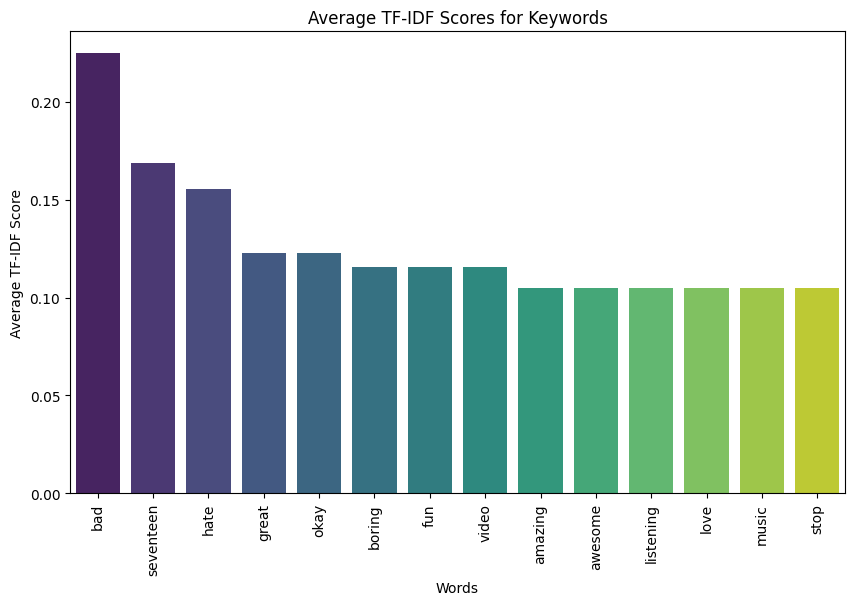

In [17]:
# Membuat Grafik untuk TF-IDF Scores
plt.figure(figsize=(10, 6))
sns.barplot(x=average_tfidf.index, y=average_tfidf.values, palette='viridis')
plt.title('Average TF-IDF Scores for Keywords')
plt.xlabel('Words')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=90)
plt.show()



<ipython-input-18-80288e5de8ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['comment'], y=df['content_based_score'], palette='coolwarm')


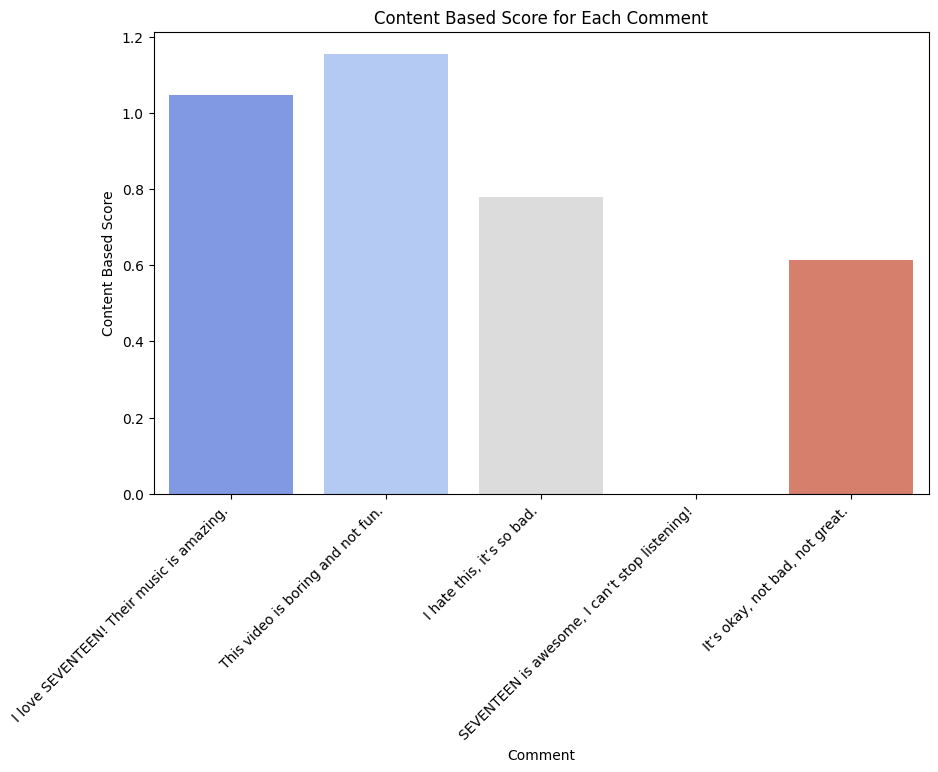

In [18]:
# Visualisasi Grafik Content Based Score untuk setiap komentar
plt.figure(figsize=(10, 6))
sns.barplot(x=df['comment'], y=df['content_based_score'], palette='coolwarm')
plt.title('Content Based Score for Each Comment')
plt.xlabel('Comment')
plt.ylabel('Content Based Score')
plt.xticks(rotation=45, ha='right')
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-19-6db40c89181b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_comments_df['content_based_score'] = df_tfidf_positive[keywords].sum(axis=1)
<ipython-input-19-6db40c89181b>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_comments_df['comment'], y=positive_comments_df['content_based_score'], palette='coolwarm')



Positive Comments with Content Based Score:
          comment  content_based_score
0   I love this!                    1
2  Amazing work!                    1


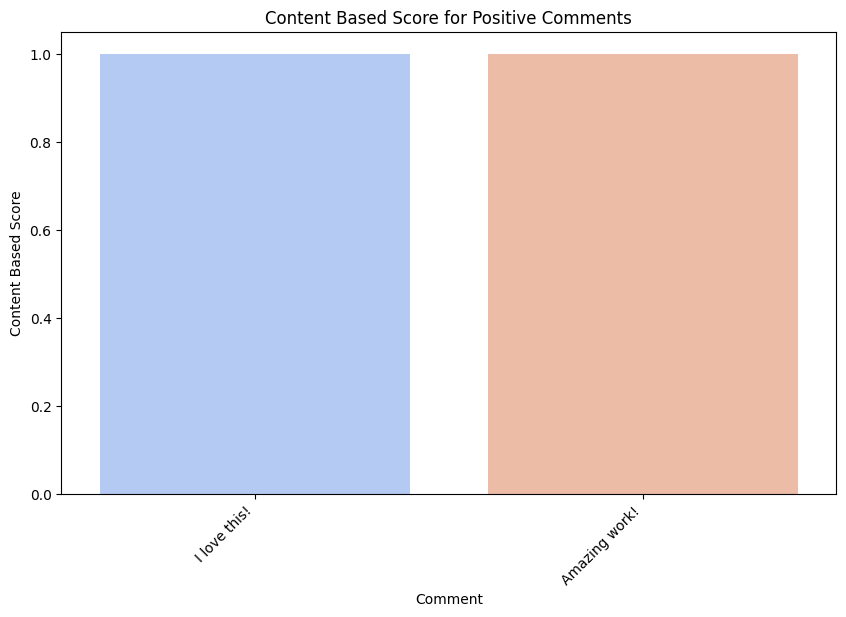

In [19]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 1
    elif sentiment_score['compound'] <= -0.05:
        return 0
    else:
        return 2

# Contoh DataFrame (ganti dengan DataFrame Anda)
data = {'comment': ['I love this!', 'This is boring.', 'Amazing work!', 'I hate it.']}
df = pd.DataFrame(data)

# Menambahkan kolom sentimen ke dalam DataFrame
df['sentiment'] = df['comment'].apply(get_sentiment)

# Memfilter hanya komentar dengan sentimen positif
positive_comments_df = df[df['sentiment'] == 1]

# Simulasi TF-IDF (ganti dengan DataFrame TF-IDF Anda)
keywords = ['love', 'hate', 'amazing', 'boring', 'great', 'fun']
df_tfidf = pd.DataFrame({
    'love': [1, 0, 0, 0],
    'hate': [0, 0, 0, 1],
    'amazing': [0, 0, 1, 0],
    'boring': [0, 1, 0, 0],
    'great': [0, 0, 0, 0],
    'fun': [0, 0, 0, 0]
}, index=df.index)

# Menghitung skor untuk setiap komentar positif berdasarkan kata kunci yang relevan
df_tfidf_positive = df_tfidf.loc[positive_comments_df.index]
positive_comments_df['content_based_score'] = df_tfidf_positive[keywords].sum(axis=1)

# Menampilkan hasil untuk komentar positif
print("\nPositive Comments with Content Based Score:\n", positive_comments_df[['comment', 'content_based_score']])

# Visualisasi Grafik Content Based Score untuk setiap komentar positif
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_comments_df['comment'], y=positive_comments_df['content_based_score'], palette='coolwarm')
plt.title('Content Based Score for Positive Comments')
plt.xlabel('Comment')
plt.ylabel('Content Based Score')
plt.xticks(rotation=45, ha='right')
plt.show()



Inference Results:
                            text  sentiment
0   I really enjoy this content!          1
1     Not my taste, very boring.          0
2   This is absolutely stunning!          1
3  Could be better, but not bad.          1


<ipython-input-20-531d5a695560>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=inference_results['sentiment'], palette="viridis")


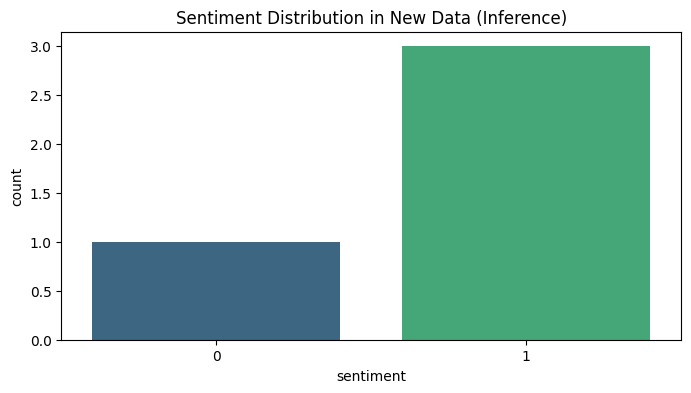

In [20]:
# Inference (Menerima Input Baru)
def inference(texts):
    # Input dapat berupa list atau teks tunggal
    if isinstance(texts, str):
        texts = [texts]  # Konversi ke list jika input adalah string tunggal

    # Prediksi sentimen untuk setiap teks
    results = [{"text": text, "sentiment": get_sentiment(text)} for text in texts]
    return pd.DataFrame(results)

# Contoh penggunaan inference
new_comments = [
    "I really enjoy this content!",
    "Not my taste, very boring.",
    "This is absolutely stunning!",
    "Could be better, but not bad.",
]

inference_results = inference(new_comments)

# Menampilkan hasil inference
print("\nInference Results:")
print(inference_results)

# Visualisasi hasil inference
plt.figure(figsize=(8, 4))
sns.countplot(x=inference_results['sentiment'], palette="viridis")
plt.title("Sentiment Distribution in New Data (Inference)")
plt.show()
